# Credit Score Dataset Part 1: Cleaning and Exploratory Data Analysis

## I. Business Understanding

The dataset and its description can be found here:
https://www.kaggle.com/datasets/parisrohan/credit-score-classification?datasetId=2289007&sortBy=commentCount


## II. Data Understanding

### 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### 2. Reading the data

In [2]:
# Load the dataset & print info
df_test = pd.read_csv('test.csv')
df_test.info()

print('\n')

df_train = pd.read_csv('train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

C:\Apps\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Print dataset's shape
display(
    df_test.shape,
    df_train.shape
)

(50000, 27)

(100000, 28)

In [4]:
# First 5 rows
df_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [5]:
# Last 5 rows
df_test.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717
49999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,_,502.38,34.108530,32 Years and 2 Months,No,35.104023,220.45787812168732,Low_spent_Medium_value_payments,360.37968260123847


In [6]:
# View column names
display(df_test.columns, df_train.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

### 3. Concatenate two datasets

In [7]:
# *Find different columns between train and test sets

l1 = df_test.columns.to_list()
l2 = df_train.columns.to_list()

diff1 = [x for x in l1 if x not in set(l2)]
diff2 = [x for x in l2 if x not in set(l1)]

display(diff1, diff2)

# *Check number of columns 
(df_train.columns[:-1] != df_test.columns).sum()

[]

['Credit_Score']

0

All columns in train and test sets are the same except train set has extra one last column Credit_Score

In [8]:
# Check for missing values in Credit_Score
df_train['Credit_Score'].isna().sum()

0

In [9]:
# Concatenate two dataframes
df = pd.concat([df_test, df_train], ignore_index=True)

### 4. Overview of new dataset

In [10]:
# View the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

In [11]:
# View columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

#### Check subset of dataset

- Ask: What is each row or each set of rows in the dataset about?

In [12]:
# Check subset of dataset
df[df['Customer_ID'] == 'CUS_0x8600']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
49992,0x25fe2,CUS_0x8600,September,Sarah McBridec,29,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.7,32.391288,6 Years and 4 Months,Yes,60.964772,107.21074164760236,Low_spent_Small_value_payments,314.8151526456419,NaN
49993,0x25fe3,CUS_0x8600,October,Sarah McBridec,29,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.7,37.528511,6 Years and 5 Months,Yes,60.964772,71.79442082882734,Low_spent_Small_value_payments,350.23147346441687,NaN
49994,0x25fe4,CUS_0x8600,November,Sarah McBridec,29,031-35-0942,_______,20002.88,1929.906667,10,...,Bad,3571.7,27.027812,6 Years and 6 Months,Yes,60.964772,50.84684680498023,High_spent_Small_value_payments,341.179047488264,NaN
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,NaN
149984,0x25fda,CUS_0x8600,January,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.7_,22.895966,5 Years and 8 Months,Yes,60.964772,43.37067007268804,High_spent_Large_value_payments,328.655224,Poor
149985,0x25fdb,CUS_0x8600,February,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.7_,39.772607,5 Years and 9 Months,Yes,12112.000000,148.2752327451465,Low_spent_Small_value_payments,273.750662,Poor
149986,0x25fdc,CUS_0x8600,March,NaN,28,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.7,24.713861,5 Years and 10 Months,Yes,60.964772,76.28279349064607,Low_spent_Small_value_payments,345.743101,Poor
149987,0x25fdd,CUS_0x8600,April,Sarah McBridec,28_,031-35-0942,Architect,20002.88,1929.906667,10,...,_,3571.7,30.614953,5 Years and 11 Months,Yes,60.964772,43.72461709437765,High_spent_Large_value_payments,328.301277,Standard
149988,0x25fde,CUS_0x8600,May,Sarah McBridec,28,#F%$D@*&8,Architect,20002.88,1929.906667,10,...,_,3571.7,28.508250,6 Years and 0 Months,Yes,60.964772,213.97800979403817,Low_spent_Small_value_payments,208.047884,Standard
149989,0x25fdf,CUS_0x8600,June,Sarah McBridec,28,031-35-0942,_______,20002.88,1929.906667,10,...,Bad,3571.7,33.359987,6 Years and 1 Months,Yes,60.964772,74.36660309585342,!@9#%8,307.659291,Standard


In [13]:
df[df['Customer_ID'] == 'CUS_0x21b1']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923,NaN
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617,NaN
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265,NaN
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783,NaN
50008,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
50009,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
50010,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
50011,0x1611,CUS_0x21b1,April,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.30622796053305,Low_spent_Medium_value_payments,465.6762241330048,Good
50012,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
50013,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good


#### Observations

We can imagine this dataset is a collection of smaller subsets, each representing a customer's monthly credit card information. It's expected that there are 12 entries for each customer, each entry matching to a month.
Because of this, we can easily fill in missing values based on existing values for the same customer.

Initial observations:
- We can fill in missing values for Name, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Credit_Mix, Credit_History_Age, Payment_of_Min_Amount
- Some columns have strange values ie. SSN, Age, Outstanding_Debt, Payment_Behaviour
- Inconsistent and invalid data eg. Age 

#### Check data uniqueness

In [14]:
# Check uniqueness in each column
for col in df.columns:
    print(col, len(df[col].unique())) # Or print out df[col].unique()

ID 150000
Customer_ID 12500
Month 12
Name 10140
Age 2524
SSN 12501
Occupation 16
Annual_Income 21192
Monthly_Inhand_Salary 13684
Num_Bank_Accounts 1183
Num_Credit_Card 1344
Interest_Rate 2394
Num_of_Loan 623
Type_of_Loan 6261
Delay_from_due_date 73
Num_of_Delayed_Payment 1059
Changed_Credit_Limit 4605
Num_Credit_Inquiries 1608
Credit_Mix 4
Outstanding_Debt 13622
Credit_Utilization_Ratio 150000
Credit_History_Age 409
Payment_of_Min_Amount 3
Total_EMI_per_month 16960
Amount_invested_monthly 136498
Payment_Behaviour 7
Monthly_Balance 148225
Credit_Score 4


### 5. Summary Statistics

In [15]:
# Summary statistics for numerical features
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,147000.000000,150000.000000,150000.000000
mean,4190.115139,17.006940,22.623447,71.234907,21.063400,28.529014,32.283309,1432.513579
std,3180.489657,117.069476,129.143006,461.537193,14.860154,194.456058,5.113315,8403.759977
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.265833,3.000000,4.000000,8.000000,10.000000,3.000000,28.054731,30.947775
50%,3091.000000,6.000000,5.000000,13.000000,18.000000,6.000000,32.297058,71.280006
75%,5948.454596,7.000000,7.000000,20.000000,28.000000,9.000000,36.487954,166.279555
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2597.000000,50.000000,82398.000000


In [16]:
# Summary statistics for categorical features
df.describe(include=object)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,150000,150000,150000,135000,150000,150000,150000,150000,150000,132888,139500,150000,150000,150000,136500,150000,143250,150000,148238,100000
unique,150000,12500,12,10139,2524,12501,16,21192,623,6260,1058,4605,4,13622,408,3,136497,7,148224,3
top,0x160a,CUS_0xd40,September,Stevex,39,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,17 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,12,12500,66,4198,8400,10500,24,21500,2112,7949,3150,54858,36,628,78484,6480,38207,15,53174


### 6. Data Visualisation
To understand our data better and see what the data actually looks like, next, I will do some data visualisations. 

Go through each column and determine the data type

- Categorical - mode (or get frequencies, proportion, percentage) & countplot/bar chart/pie chart
- Continuous - mean, median & histogram (better for identifying modes), boxplot (better than histogram in showing outliers)

For two or more variables
- Numeric Numeric - correlation, pivot
- Categorical Categorical - pivot
- Categorical Numeric - violin plot

### 6.1 Numerical features

See below for detailed analysis with visualisation for each variable

### 6.2 Categorical features

#### Visualise some categorical features with small number of categories

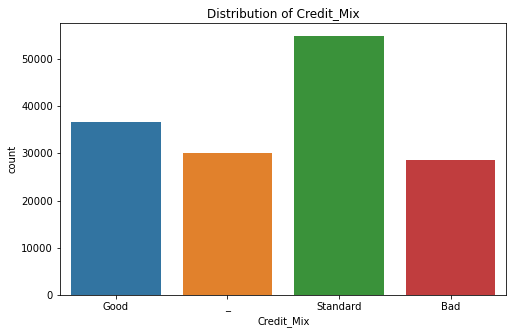

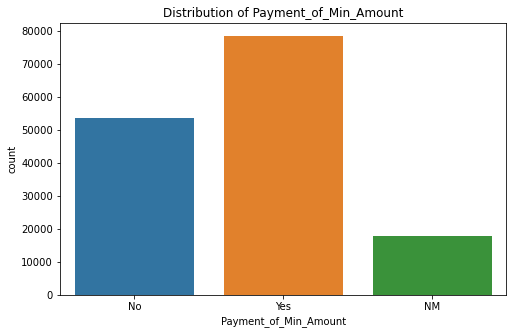

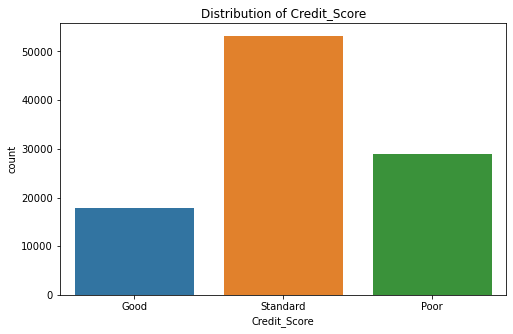

In [17]:
nominal_col = ['Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score']

def countplot():
    for col in nominal_col:
        plt.figure(figsize=(8,5))
        plt.title('Distribution of '+ col)
        sns.countplot(x=col, data=df,)
        plt.show()
countplot()

### 7. Check data quality

Tips:
- Divide into two groups for analysis: numerical and categorical features
- Show value_counts, outliers
- Check percentage, show null and not null values for missing value-variables. Ask: "Is missing data telling me something valuable?"





#### Check Outliers

In [18]:
def lower_upper_bound(col): # Col as string
    Q1 = df[col].quantile(.25) 
    Q3 = df[col].quantile(.75)
    Lower = Q1 - 1.5*(Q3-Q1)
    Upper = Q3 + 1.5*(Q3-Q1)
    return(Lower, Upper)

#### Analyse each column

#### 7.0 ID

- Categorical

In [19]:
len(df['ID'].unique())

150000

#### 7.1 Customer_ID

- Categorical

In [20]:
len(df['Customer_ID'].unique())

12500

There are 12,500 distinct customer_ID in the dataset.

#### 7.2 Month
- Categorical
- Need to change to number

In [21]:
len(df['Month'].unique())

12

In [22]:
df['Month'].value_counts()

September    12500
October      12500
November     12500
December     12500
January      12500
February     12500
March        12500
April        12500
May          12500
June         12500
July         12500
August       12500
Name: Month, dtype: int64

The number of records for each month corresponds to the number of distinct customer records ie. Each customer has 12 records corresponding to 1 month.

#### 7.3 Name
- Categorical
- Missing values
- Same name values for same Customer_ID

In [23]:
df.Name.isnull().sum()

15000

In [24]:
# Percentage
df['Name'].isnull().sum() / df.shape[0]

0.1

In [25]:
# Show Name null values
display(df[df.Name.isnull()].tail())

# *Show Name not null values
display(df[~df.Name.isnull()].tail())

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149964,0x25fba,CUS_0x372c,May,NaN,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.6460933992599,Low_spent_Small_value_payments,151.210033,Good
149965,0x25fbb,CUS_0x372c,June,NaN,19,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.3559686116327,Low_spent_Large_value_payments,394.500158,Good
149969,0x25fc3,CUS_0xf16,February,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.64623687765652,High_spent_Small_value_payments,267.043119,Good
149973,0x25fc7,CUS_0xf16,June,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,24.972853,21 Years and 6 Months,No,41.113561,__10000__,Low_spent_Small_value_payments,233.301539,Good
149986,0x25fdc,CUS_0x8600,March,NaN,28,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.7,24.713861,5 Years and 10 Months,Yes,60.964772,76.28279349064607,Low_spent_Small_value_payments,345.743101,Poor


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
149996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
149997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
149998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
149999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


#### 7.4 Age
- Categorical
- Inconsistent data (with _) & Invalid data

In [26]:
df['Age'].value_counts()[-5:]

6365     1
3485     1
2824     1
4383_    1
2263     1
Name: Age, dtype: int64

#### 7.5 SSN
- Categorical
- Invalid data. Same SSN values for same Customer_ID

In [27]:
df['SSN'].value_counts()

#F%$D@*&8      8400
078-73-5990      12
374-03-0670      12
255-39-8777      12
866-11-3352      12
               ... 
074-52-8105       7
917-01-2750       7
803-44-6289       7
478-17-8849       7
642-73-7670       6
Name: SSN, Length: 12501, dtype: int64

#### 7.6 Occupation

- Categorical
- Invalid data. Same Occupation values for same Customer_ID

In [28]:
df['Occupation'].value_counts()

_______          10500
Lawyer            9899
Engineer          9562
Architect         9550
Mechanic          9459
Accountant        9404
Scientist         9403
Developer         9381
Media_Manager     9362
Teacher           9318
Entrepreneur      9277
Journalist        9122
Doctor            9114
Manager           8973
Musician          8858
Writer            8818
Name: Occupation, dtype: int64

#### 7.7 Annual_Income

- Categorical
- Invalid data with _ at end
- Same values for same Customer_ID???

In [29]:
df['Annual_Income'].value_counts()

36585.12              24
9141.63               23
95596.35              23
20867.67              23
17816.75              23
                      ..
99565.36_              1
10810032.0             1
49995.18000000001_     1
122942.28_             1
57107.12_              1
Name: Annual_Income, Length: 21192, dtype: int64

#### 7.8 Monthly_Inhand_Salary
Represents the monthly base salary of a person

- Numerical
- Missing values
- Need to check if most Customer_ID has same values for monthly salary 
- Outliers

In [30]:
df['Monthly_Inhand_Salary'].isnull().sum()

22500

In [31]:
# Percentage
df['Monthly_Inhand_Salary'].isnull().sum() / df.shape[0]

0.15

In [32]:
# Show null values
display(df[df['Monthly_Inhand_Salary'].isnull()].tail())

# *Show not null values
display(df[~df['Monthly_Inhand_Salary'].isnull()].tail())

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149944,0x25f9e,CUS_0x51b3,January,Ryana,33,837-85-9800,Media_Manager,59146.36,NaN,2,...,_,418.03,34.720661,NaN,No,26.778419,606.4365424304076,Low_spent_Small_value_payments,147.671372,Standard
149955,0x25fad,CUS_0x2084,April,Ryanl,21,253-72-7758,Architect,38321.39,NaN,4,...,Good,678.57,35.455305,17 Years and 2 Months,No,362.072453,293.71319332766717,Low_spent_Large_value_payments,197.460577,Standard
149963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,-500,340-85-7301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard
149975,0x25fc9,CUS_0xf16,August,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35,NaN,1,...,Good,897.16,41.212367,NaN,No,41.113561,70.8055497847255,Low_spent_Large_value_payments,310.883806,Good
149978,0x25fd0,CUS_0xaf61,March,Chris Wickhamm,49,133-16-7738,Writer,37188.1,NaN,1,...,_,620.64,24.540510,29 Years and 11 Months,No,84.205949,125.95659173463726,Low_spent_Medium_value_payments,379.538292,Good


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
149996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
149997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
149998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
149999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


#### Visualise using plt.hist

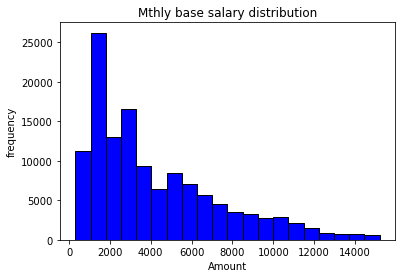

In [33]:
# Plot histogram and comment on the skewness
salary = df['Monthly_Inhand_Salary'].values

plt.hist(salary, color='blue', edgecolor='black', bins=20)
plt.title("Mthly base salary distribution")
plt.xlabel("Amount")
plt.ylabel("frequency")
plt.show()

#### Visualise using sns.histplot

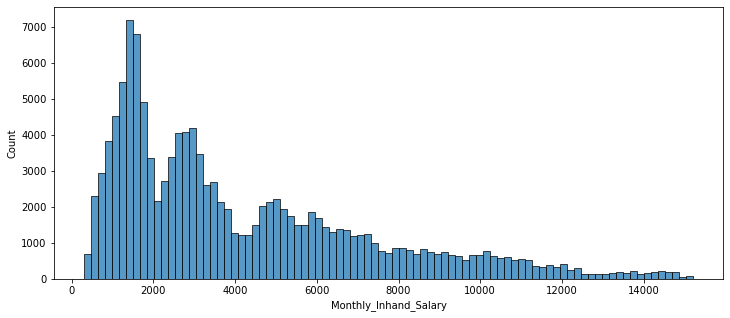

In [34]:
plt.figure(figsize=(12,5))
sns.histplot(x=df['Monthly_Inhand_Salary'], data=df)
plt.show()

In [35]:
lower_upper_bound('Monthly_Inhand_Salary')

(-4859.517310373341, 12433.237739511123)

#### Visualise outliers using sns.boxplot

In [36]:
df['Monthly_Inhand_Salary'].describe()

count    127500.000000
mean       4190.115139
std        3180.489657
min         303.645417
25%        1625.265833
50%        3091.000000
75%        5948.454596
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

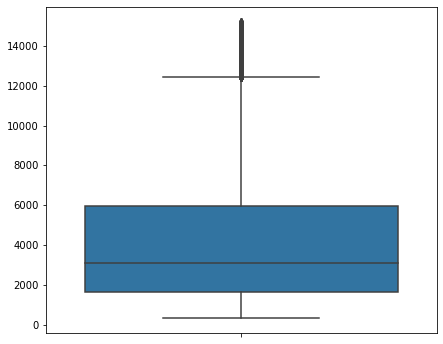

In [37]:
plt.figure(figsize=(7,6))
sns.boxplot(y=salary)
plt.show()

In [38]:
df['Monthly_Inhand_Salary'].value_counts().sort_index()

303.645417      10
319.556250      11
331.031923       2
332.128333      10
332.431250      10
                ..
15101.940000    11
15115.190000    10
15136.696667    10
15167.180000    12
15204.633333    10
Name: Monthly_Inhand_Salary, Length: 13683, dtype: int64

#### 7.9 Num_Bank_Accounts
Represents the number of bank accounts a person holds
- Numerical
- Outliers

In [39]:
# First 10
df['Num_Bank_Accounts'].value_counts().sort_values()[:10]

1270    1
713     1
771     1
1313    1
690     1
861     1
734     1
854     1
116     1
657     1
Name: Num_Bank_Accounts, dtype: int64

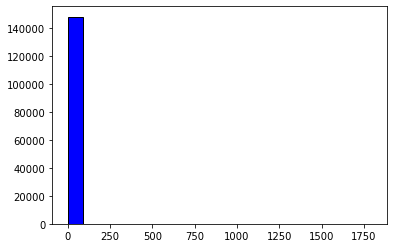

In [40]:
num_bank_accounts = df['Num_Bank_Accounts'].values
plt.hist(num_bank_accounts, color='blue', edgecolor='black', bins=20)
plt.show()

In [41]:
lower_upper_bound('Num_Bank_Accounts')

(-3.0, 13.0)

#### 7.10 Num_Credit_Card
Represents the number of other credit cards held by a person
- Numerical
- Outliers

In [42]:
# First 10
df['Num_Credit_Card'].value_counts().sort_values()[:10]

679     1
772     1
1280    1
386     1
430     1
1098    1
312     1
80      1
1175    1
346     1
Name: Num_Credit_Card, dtype: int64

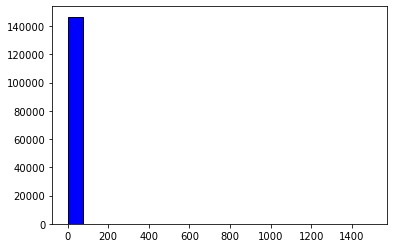

In [43]:
num_credit_card = df['Num_Credit_Card'].values
plt.hist(num_credit_card, color='blue', edgecolor='black', bins=20)
plt.show()

In [44]:
lower_upper_bound('Num_Credit_Card')

(-0.5, 11.5)

#### 7.11 Interest_Rate
Represents the interest rate on credit card
- Numerical
- Invalid data
- Outliers

In [45]:
# First 10
df['Interest_Rate'].value_counts().sort_values()[:10]

440     1
1122    1
1993    1
209     1
2134    1
1782    1
2179    1
3138    1
1203    1
1372    1
Name: Interest_Rate, dtype: int64

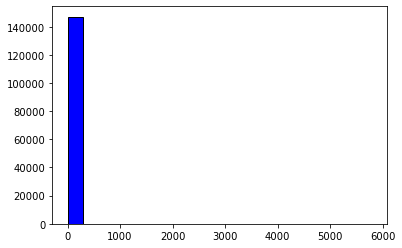

In [46]:
int_rate = df['Interest_Rate'].values
plt.hist(int_rate, color='blue', edgecolor='black', bins=20)
plt.show()

In [47]:
lower_upper_bound('Interest_Rate')

(-10.0, 38.0)

#### 7.12 Num_of_Loan

- Numerical
- Invalid data & outliers

In [48]:
df['Num_of_Loan'].value_counts().sort_values()[:10]

1320    1
255     1
1244    1
393     1
1231    1
551     1
368     1
53      1
478     1
220     1
Name: Num_of_Loan, dtype: int64

In [49]:
# lower_upper_bound('Num_of_Loan') - can't run as there are strings

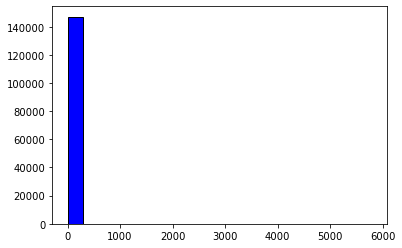

In [50]:
num_loan = df['Num_of_Loan'].values
plt.hist(int_rate, color='blue', edgecolor='black', bins=20)
plt.show()

#### 7.13 Type_of_Loan

- Categorical
- Missing values
- Count of type of loan depending on Num_of_Loan?
- Duplicates found? eg. Personal Loan, Personal Loan, Payday Loan, and Payday Loan

In [51]:
df['Type_of_Loan'].isnull().sum()

17112

In [52]:
df['Type_of_Loan'].isnull().sum() / df.shape[0]

0.11408

In [53]:
# Show null values
display(df[df['Type_of_Loan'].isnull()].iloc[:10, :15])

# *Show not null values
display(df[~df['Type_of_Loan'].isnull()].iloc[-10:, :15])

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date
16,0x163a,CUS_0x1cdb,September,Deepaa,22,615-06-7821,Developer,35547.71,2853.309167,7,5,5,0,NaN,5
17,0x163b,CUS_0x1cdb,October,Deepaa,22,#F%$D@*&8,Developer,35547.71,2853.309167,7,5,5,0,NaN,5
18,0x163c,CUS_0x1cdb,November,Deepaa,22,615-06-7821,Developer,35547.71,2853.309167,7,5,5,-100,NaN,5
19,0x163d,CUS_0x1cdb,December,Deepaa,22,615-06-7821,Developer,35547.71,2853.309167,7,5,5,0,NaN,5
20,0x1646,CUS_0x95ee,September,Np,31,612-70-8987,Lawyer,73928.46,5988.705000,4,5,8,0,NaN,8
21,0x1647,CUS_0x95ee,October,Np,32,612-70-8987,Lawyer,73928.46,5988.705000,4,5,8,0,NaN,9
22,0x1648,CUS_0x95ee,November,Np,1694,612-70-8987,Lawyer,73928.46,5988.705000,4,5,8,0,NaN,8
23,0x1649,CUS_0x95ee,December,Np,32,612-70-8987,Lawyer,73928.46,5988.705000,4,5,8,0,NaN,8
64,0x16ca,CUS_0x6070,September,NaN,21,891-55-9364,Accountant,92047.08,7591.590000,6,7,16,0,NaN,11
65,0x16cb,CUS_0x6070,October,Parkm,21,891-55-9364,Accountant,92047.08_,NaN,6,7,16,0,NaN,16


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date
149990,0x25fe0,CUS_0x8600,July,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33
149991,0x25fe1,CUS_0x8600,August,Sarah McBridec,29,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33
149992,0x25fe6,CUS_0x942c,January,Nicks,24,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23
149993,0x25fe7,CUS_0x942c,February,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23
149994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20
149995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23
149996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18
149997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27
149998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20
149999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18


In [54]:
df['Type_of_Loan'].value_counts().sort_values()[:10]

Personal Loan, Personal Loan, Payday Loan, and Payday Loan                                                                                                      12
Not Specified, Debt Consolidation Loan, Mortgage Loan, Not Specified, Mortgage Loan, and Not Specified                                                          12
Debt Consolidation Loan, Debt Consolidation Loan, Payday Loan, Credit-Builder Loan, Credit-Builder Loan, and Auto Loan                                          12
Auto Loan, Debt Consolidation Loan, Credit-Builder Loan, Not Specified, Not Specified, Debt Consolidation Loan, and Payday Loan                                 12
Credit-Builder Loan, Auto Loan, Payday Loan, Debt Consolidation Loan, Not Specified, and Mortgage Loan                                                          12
Student Loan, Debt Consolidation Loan, Not Specified, Mortgage Loan, Personal Loan, Home Equity Loan, and Home Equity Loan                                      12
Credit-Builder Loan, S

#### 7.14 Delay_from_due_date
Represents the average number of days delayed from the payment date
- Numerical
- Outliers

In [55]:
df['Delay_from_due_date'].value_counts().sort_index()

-5      51
-4     111
-3     177
-2     239
-1     311
      ... 
 63     90
 64     97
 65     86
 66     44
 67     29
Name: Delay_from_due_date, Length: 73, dtype: int64

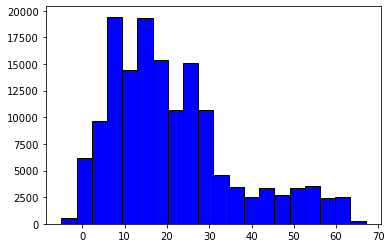

In [56]:
delay = df['Delay_from_due_date'].values
plt.hist(delay, color='blue', edgecolor='black', bins=20)
plt.show()

In [57]:
lower_upper_bound('Delay_from_due_date')

(-17.0, 55.0)

In [58]:
df['Delay_from_due_date'].describe()

count    150000.000000
mean         21.063400
std          14.860154
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

#### 7.15 Num_of_Delayed_Payment

- Categorical - Should be numerical
- Inconsistent data
- Missing values

In [59]:
df['Num_of_Delayed_Payment'].isnull().sum()

10500

In [60]:
df['Num_of_Delayed_Payment'].isnull().sum() / df.shape[0]

0.07

In [61]:
# Show null values
display(df[df['Num_of_Delayed_Payment'].isnull()].iloc[-3:, :20])

# *Show not null values
display(df[~df['Num_of_Delayed_Payment'].isnull()].iloc[-3:, :20])

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
149992,0x25fe6,CUS_0x942c,January,Nicks,24,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,NaN,9.5,3.0,_,502.38
149993,0x25fe7,CUS_0x942c,February,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,NaN,11.5,3.0,Good,502.38
149998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
149996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38
149997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38
149999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38


#### 7.16 Changed_Credit_Limit
Represents the percentage change in credit card limit
- Categorical -> Numerical
- Invalid data _

In [62]:
df['Changed_Credit_Limit'].value_counts()

_                      3150
11.5                    197
8.22                    189
11.32                   189
7.35                    181
                       ... 
-4.82                     1
-4.57                     1
-1.3899999999999997       1
11.579999999999998        1
21.17                     1
Name: Changed_Credit_Limit, Length: 4605, dtype: int64

#### 7.17 Num_Credit_Inquiries
Represents the number of credit card inquiries
- Numerical, float -> change to int
- Missing values
- Outliers

In [63]:
df['Num_Credit_Inquiries'].isnull().sum()

3000

In [64]:
df['Num_Credit_Inquiries'].isnull().sum() / df.shape[0]

0.02

In [65]:
# Show null values
display(df[df['Num_Credit_Inquiries'].isnull()].iloc[-3:, :18])

# *Show not null values
display(df[~df['Num_Credit_Inquiries'].isnull()].iloc[-3:, :18])

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries
149874,0x25f34,CUS_0x3855,March,Xolai,27,963-55-7106,Scientist,118677.54,9963.795,4,4,6,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11,9.59,NaN
149900,0x25f5a,CUS_0x4986,May,Charles Abbotta,33,971-61-8388,Entrepreneur,41329.56,3421.130,2,3,7,1,Not Specified,1,10,-0.33999999999999986,NaN
149901,0x25f5b,CUS_0x4986,June,Charles Abbotta,34,971-61-8388,_______,41329.56,3421.130,2,3,7,-100,Not Specified,2,10,10.66,NaN


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries
149997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0
149998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0
149999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0


In [66]:
df['Num_Credit_Inquiries'].value_counts()

4.0       15673
6.0       12486
3.0       12356
7.0       12353
8.0       11788
          ...  
1119.0        1
1479.0        1
1015.0        1
361.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1607, dtype: int64

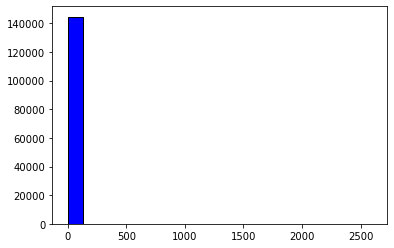

In [67]:
Num_Credit_Inquiries = df['Num_Credit_Inquiries'].values
plt.hist(Num_Credit_Inquiries, color='blue', edgecolor='black', bins=20)
plt.show()

In [68]:
lower_upper_bound('Num_Credit_Inquiries')

(-6.0, 18.0)

#### 7.18 Credit_Mix
Represents the classification of the mix of credits
- Categorical
- Invalid data. Same values for same customer

In [69]:
df['Credit_Mix'].value_counts()

Standard    54858
Good        36597
_           30000
Bad         28545
Name: Credit_Mix, dtype: int64

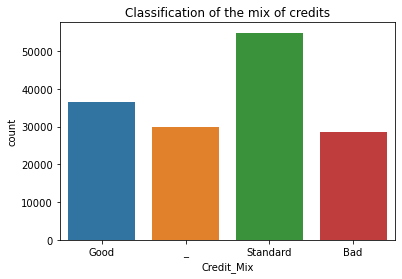

In [70]:
plt.title('Classification of the mix of credits')
sns.countplot(x=df['Credit_Mix'], data=df)
plt.show()

In [71]:
df.iloc[-11:, :20]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
149989,0x25fdf,CUS_0x8600,June,Sarah McBridec,28,031-35-0942,_______,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,16.31,9.0,Bad,3571.7
149990,0x25fe0,CUS_0x8600,July,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,26,18.31,9.0,Bad,3571.7
149991,0x25fe1,CUS_0x8600,August,Sarah McBridec,29,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,18.31,9.0,Bad,3571.7
149992,0x25fe6,CUS_0x942c,January,Nicks,24,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,NaN,9.5,3.0,_,502.38
149993,0x25fe7,CUS_0x942c,February,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,NaN,11.5,3.0,Good,502.38
149994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6,9.5,3.0,_,502.38
149995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38
149996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38
149997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38
149998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38


#### 7.19 Outstanding_Debt

- Categorical
- Invalid data


In [72]:
df['Outstanding_Debt'].value_counts()

1360.45     36
1151.7      35
1109.03     35
460.46      35
935.74      24
            ..
2354.21_     1
1435.94_     1
1342.61_     1
1343.01_     1
878.19_      1
Name: Outstanding_Debt, Length: 13622, dtype: int64

#### 7.20 Credit_Utilization_Ratio
Represents the utilization ratio of credit card ie. total outstanding debt divided by total credit available to you
- Numerical
- Outliers

In [73]:
df['Credit_Utilization_Ratio'].value_counts().sort_values()

35.030402    1
36.424835    1
31.652351    1
35.229707    1
33.811894    1
            ..
39.323569    1
34.663572    1
40.565631    1
34.026427    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 150000, dtype: int64

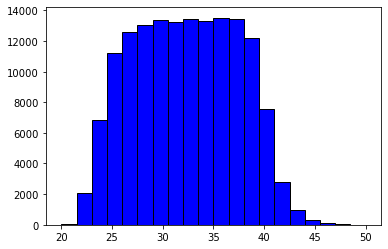

In [74]:
credit_ratio = df['Credit_Utilization_Ratio'].values

plt.hist(credit_ratio, color='blue', edgecolor='black', bins=20)
plt.show()

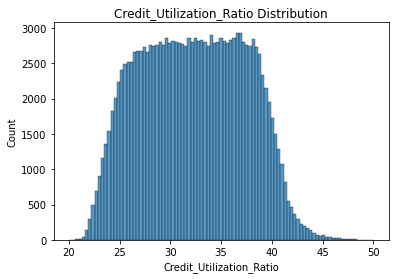

In [75]:
plt.title('Credit_Utilization_Ratio Distribution')
sns.histplot(x=df['Credit_Utilization_Ratio'], data=df)
plt.show()

In [76]:
df['Credit_Utilization_Ratio'].describe()

count    150000.000000
mean         32.283309
std           5.113315
min          20.000000
25%          28.054731
50%          32.297058
75%          36.487954
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

In [77]:
lower_upper_bound('Credit_Utilization_Ratio')

(15.404896986004324, 49.137787958522345)

#### 7.21 Credit_History_Age

- Categorical -> Should be measured in years
- Missing values -> Fill using other columns

In [78]:
df['Credit_History_Age'].isnull().sum()

13500

In [79]:
df['Credit_History_Age'].isnull().sum() / df.shape[0]

0.09

In [80]:
# Show null values
display(df[df['Credit_History_Age'].isnull()].iloc[-3:, -10:])

# *Show not null values
display(df[~df['Credit_History_Age'].isnull()].iloc[-3:, -10:])

,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149968,Good,897.16,39.868572,NaN,NM,41.113561,52.95197781627658,High_spent_Small_value_payments,318.737378,Good
149975,Good,897.16,41.212367,NaN,No,41.113561,70.8055497847255,Low_spent_Large_value_payments,310.883806,Good
149990,Bad,3571.7,25.123535,NaN,Yes,60.964772,173.2755025599617,Low_spent_Large_value_payments,228.750392,Standard


,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149997,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
149998,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
149999,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


#### 7.22 Payment_of_Min_Amount
Represents whether only the minimum amount was paid by the person

- Categorical
- What is NM? Not mentioned?

In [81]:
df['Payment_of_Min_Amount'].value_counts().sort_values()

NM     18000
No     53516
Yes    78484
Name: Payment_of_Min_Amount, dtype: int64

In [82]:
df[df['Payment_of_Min_Amount'] == 'NM'].iloc[:10, :23]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount
26,0x1654,CUS_0x284a,November,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,"Credit-Builder Loan, and Mortgage Loan",0,1,9.34,4.0,Good,352.16,26.066640,31 Years and 5 Months,NM
27,0x1655,CUS_0x284a,December,Nadiaq,34,411-51-0676,Lawyer,131313.4,NaN,0,...,"Credit-Builder Loan, and Mortgage Loan",0,0,10.34,4.0,Good,352.16,34.665593,31 Years and 6 Months,NM
30,0x1660,CUS_0x5407,November,NaN,31,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,"Not Specified, Auto Loan, and Student Loan",29,15,17.13,9.0,Standard,1704.18,35.822516,15 Years and 5 Months,NM
31,0x1661,CUS_0x5407,December,Annk,31,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,"Not Specified, Auto Loan, and Student Loan",30,14,17.13,9.0,Standard,1704.18,34.748953,15 Years and 6 Months,NM
32,0x166a,CUS_0x4157,September,Charlie Zhur,24,070-19-1622,Doctor,114838.41,9843.867500,2,...,"Personal Loan, Debt Consolidation Loan, and Au...",11,12,8.24,8.0,Good,1377.74,41.459018,22 Years and 0 Months,NM
42,0x1684,CUS_0xa66b,November,Saphirj,41,221-30-8554,Teacher,33751.27,2948.605833,5,...,"Credit-Builder Loan, Personal Loan, and Auto Loan",11,20,14.0,8.0,_,1328.93,34.921444,20 Years and 0 Months,NM
46,0x1690,CUS_0xc0ab,November,Soyoungd,33,342-90-2649,_______,88640.24,7266.686667,3,...,"Payday Loan, and Payday Loan",-1,2,3.51,5.0,Good,950.36,38.847659,26 Years and 3 Months,NM
61,0x16bf,CUS_0x33d2,October,Chalmersa,31,965-46-2491,Scientist,31993.78,2942.148333,163,...,"Payday Loan, and Home Equity Loan",8,NaN,6.28,1.0,Standard,818.22,27.112845,17 Years and 7 Months,NM
65,0x16cb,CUS_0x6070,October,Parkm,21,891-55-9364,Accountant,92047.08_,NaN,6,...,NaN,16,11,9.13,4.0,Standard,1296.64,34.659087,29 Years and 11 Months,NM
73,0x16e3,CUS_0x3553,October,Laurence Frosty,27,084-25-3745,Musician,97791.42,7449.469347,6,...,NaN,18,8,17.92,1.0,Standard,107.41,32.484477,27 Years and 11 Months,NM


In [83]:
df[df['Customer_ID'] == 'CUS_0x284a'].iloc[:, :23]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount
24,0x1652,CUS_0x284a,September,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,"Credit-Builder Loan, and Mortgage Loan",0,NaN,9.34,4.0,Good,352.16,28.401058,NaN,No
25,0x1653,CUS_0x284a,October,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,"Credit-Builder Loan, and Mortgage Loan",0,2_,9.34,4.0,Good,352.16,31.025571,31 Years and 4 Months,No
26,0x1654,CUS_0x284a,November,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,"Credit-Builder Loan, and Mortgage Loan",0,1,9.34,4.0,Good,352.16,26.066640,31 Years and 5 Months,NM
27,0x1655,CUS_0x284a,December,Nadiaq,34,411-51-0676,Lawyer,131313.4,NaN,0,...,"Credit-Builder Loan, and Mortgage Loan",0,0,10.34,4.0,Good,352.16,34.665593,31 Years and 6 Months,NM
50048,0x164a,CUS_0x284a,January,Nadiaq,33,411-51-0676,Lawyer,131313.4,11242.783333,0,...,"Credit-Builder Loan, and Mortgage Loan",0,3,9.34,2.0,Good,352.16,32.200509,30 Years and 7 Months,NM
50049,0x164b,CUS_0x284a,February,Nadiaq,34,411-51-0676,Lawyer,131313.4,11242.783333,0,...,"Credit-Builder Loan, and Mortgage Loan",-1,2,15.34,4.0,Good,352.16,31.983710,30 Years and 8 Months,No
50050,0x164c,CUS_0x284a,March,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,"Credit-Builder Loan, and Mortgage Loan",0,3,9.34,4.0,Good,352.16,31.803134,30 Years and 9 Months,NM
50051,0x164d,CUS_0x284a,April,Nadiaq,34,#F%$D@*&8,Lawyer,131313.4,10469.207759,0,...,"Credit-Builder Loan, and Mortgage Loan",0,2,8.34,4.0,Good,352.16,42.645785,30 Years and 10 Months,No
50052,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,"Credit-Builder Loan, and Mortgage Loan",0,4,9.34,4.0,Good,352.16,40.902517,30 Years and 11 Months,No
50053,0x164f,CUS_0x284a,June,Nadiaq,34,411-51-0676,Lawyer,131313.4,NaN,0,...,"Credit-Builder Loan, and Mortgage Loan",0,3_,11.34,4.0,Good,352.16,41.980170,31 Years and 0 Months,No


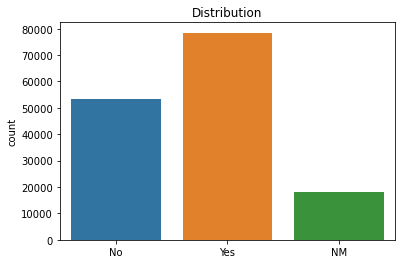

In [84]:
plt.title('Distribution')
sns.countplot(x=df['Payment_of_Min_Amount'].values, data=df)
plt.show()

#### 7.23 Total_EMI_per_month
Represents the monthly EMI (Equated Monthly Installment) payments (in USD)

- Numerical float -> Change to 2 decimal places

In [85]:
df['Total_EMI_per_month'].value_counts().sort_values()

58638.000000        1
123.452331          1
42028.000000        1
20838.000000        1
58242.000000        1
                ...  
29.153765          12
425.546778         12
83.959892          12
51.743255          12
0.000000        15615
Name: Total_EMI_per_month, Length: 16960, dtype: int64

In [86]:
df['Total_EMI_per_month'].value_counts().sort_index(ascending=False)

82398.000000        1
82347.000000        1
82331.000000        1
82316.000000        1
82256.000000        1
                ...  
4.916139           12
4.865690           12
4.713184           12
4.462837           12
0.000000        15615
Name: Total_EMI_per_month, Length: 16960, dtype: int64

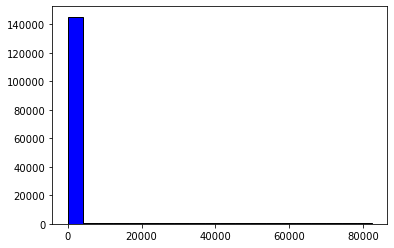

In [87]:
Total_EMI_per_month = df['Total_EMI_per_month'].values

plt.hist(Total_EMI_per_month, color='blue', edgecolor='black', bins=20)
plt.show()

In [88]:
df[df['Customer_ID'] == 'CUS_0x284a']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
24,0x1652,CUS_0x284a,September,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,28.401058,NaN,No,911.220179,324.22863933025934,High_spent_Medium_value_payments,912.4050886016523,NaN
25,0x1653,CUS_0x284a,October,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,31.025571,31 Years and 4 Months,No,911.220179,966.0743358890512,Low_spent_Large_value_payments,290.5593920428604,NaN
26,0x1654,CUS_0x284a,November,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,26.066640,31 Years and 5 Months,NM,911.220179,1141.220312604539,Low_spent_Medium_value_payments,125.41341532737272,NaN
27,0x1655,CUS_0x284a,December,Nadiaq,34,411-51-0676,Lawyer,131313.4,NaN,0,...,Good,352.16,34.665593,31 Years and 6 Months,NM,911.220179,555.8479876829251,Low_spent_Medium_value_payments,710.7857402489867,NaN
50048,0x164a,CUS_0x284a,January,Nadiaq,33,411-51-0676,Lawyer,131313.4,11242.783333,0,...,Good,352.16,32.200509,30 Years and 7 Months,NM,137.644605,378.1712535207537,High_spent_Medium_value_payments,858.462474411158,Good
50049,0x164b,CUS_0x284a,February,Nadiaq,34,411-51-0676,Lawyer,131313.4,11242.783333,0,...,Good,352.16,31.983710,30 Years and 8 Months,No,137.644605,698.8732707169384,High_spent_Small_value_payments,547.7604572149734,Good
50050,0x164c,CUS_0x284a,March,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,31.803134,30 Years and 9 Months,NM,911.220179,188.06432109973838,High_spent_Large_value_payments,1038.5694068321734,Good
50051,0x164d,CUS_0x284a,April,Nadiaq,34,#F%$D@*&8,Lawyer,131313.4,10469.207759,0,...,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good
50052,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,40.902517,30 Years and 11 Months,No,32662.000000,263.3789089320552,High_spent_Large_value_payments,963.2548189998564,Good
50053,0x164f,CUS_0x284a,June,Nadiaq,34,411-51-0676,Lawyer,131313.4,NaN,0,...,Good,352.16,41.980170,31 Years and 0 Months,No,911.220179,86.56638801207531,High_spent_Large_value_payments,1140.0673399198365,Standard


In [89]:
lower_upper_bound('Total_EMI_per_month')

(-172.04989544593764, 369.27722603214465)

#### 7.24 Amount_invested_monthly

- Categorical - should be numerical
- Inconsistent data with _

In [90]:
# Show null values
display(df[df['Amount_invested_monthly'].isnull()].iloc[-3:, :])

# *Show not null values
display(df[~df['Amount_invested_monthly'].isnull()].iloc[-5:, :])

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149925,0x25f7f,CUS_0x2654,June,enj,38,647-67-8889,Media_Manager,139664.96,11777.746667,3,...,Standard,365.66,27.714375,30 Years and 0 Months,Yes,423.731016,NaN,Low_spent_Large_value_payments,182.547539,Standard
149961,0x25fb7,CUS_0x372c,February,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,33.494867,28 Years and 2 Months,No,34.975457,NaN,High_spent_Medium_value_payments,484.416627,Good
149974,0x25fc8,CUS_0xf16,July,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35_,1528.029167,1,...,_,897.16,36.166925,21 Years and 7 Months,No,41.113561,NaN,Low_spent_Small_value_payments,340.684834,Good


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
149996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
149997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
149998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
149999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [91]:
df['Amount_invested_monthly'].value_counts().sort_values()

41.86652723864064        1
251.62736875017606       1
72.68014533363515        1
153.53448761392985       1
397.50365354404653       1
                      ... 
401.1964806036356        1
34.66290609052614        1
24.02847744864441        1
0.0                    275
__10000__             6480
Name: Amount_invested_monthly, Length: 136497, dtype: int64

#### 7.25 Payment_Behaviour
Represents the payment behavior of the customer (in USD)
- Categorical 
- Invalid data
- Make best guesses from other months?

In [92]:
df['Payment_Behaviour'].value_counts().sort_values()

!@9#%8                              11400
Low_spent_Large_value_payments      15677
High_spent_Small_value_payments     16991
High_spent_Large_value_payments     20565
Low_spent_Medium_value_payments     20698
High_spent_Medium_value_payments    26462
Low_spent_Small_value_payments      38207
Name: Payment_Behaviour, dtype: int64

In [93]:
df[df['Customer_ID'] == 'CUS_0x284a']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
24,0x1652,CUS_0x284a,September,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,28.401058,NaN,No,911.220179,324.22863933025934,High_spent_Medium_value_payments,912.4050886016523,NaN
25,0x1653,CUS_0x284a,October,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,31.025571,31 Years and 4 Months,No,911.220179,966.0743358890512,Low_spent_Large_value_payments,290.5593920428604,NaN
26,0x1654,CUS_0x284a,November,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,26.066640,31 Years and 5 Months,NM,911.220179,1141.220312604539,Low_spent_Medium_value_payments,125.41341532737272,NaN
27,0x1655,CUS_0x284a,December,Nadiaq,34,411-51-0676,Lawyer,131313.4,NaN,0,...,Good,352.16,34.665593,31 Years and 6 Months,NM,911.220179,555.8479876829251,Low_spent_Medium_value_payments,710.7857402489867,NaN
50048,0x164a,CUS_0x284a,January,Nadiaq,33,411-51-0676,Lawyer,131313.4,11242.783333,0,...,Good,352.16,32.200509,30 Years and 7 Months,NM,137.644605,378.1712535207537,High_spent_Medium_value_payments,858.462474411158,Good
50049,0x164b,CUS_0x284a,February,Nadiaq,34,411-51-0676,Lawyer,131313.4,11242.783333,0,...,Good,352.16,31.983710,30 Years and 8 Months,No,137.644605,698.8732707169384,High_spent_Small_value_payments,547.7604572149734,Good
50050,0x164c,CUS_0x284a,March,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,31.803134,30 Years and 9 Months,NM,911.220179,188.06432109973838,High_spent_Large_value_payments,1038.5694068321734,Good
50051,0x164d,CUS_0x284a,April,Nadiaq,34,#F%$D@*&8,Lawyer,131313.4,10469.207759,0,...,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good
50052,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,131313.4,10469.207759,0,...,Good,352.16,40.902517,30 Years and 11 Months,No,32662.000000,263.3789089320552,High_spent_Large_value_payments,963.2548189998564,Good
50053,0x164f,CUS_0x284a,June,Nadiaq,34,411-51-0676,Lawyer,131313.4,NaN,0,...,Good,352.16,41.980170,31 Years and 0 Months,No,911.220179,86.56638801207531,High_spent_Large_value_payments,1140.0673399198365,Standard


#### 7.26 Monthly_Balance

- Categorical
- Invalid data with _
- Missing values

In [94]:
df['Monthly_Balance'].isnull().sum()

1762

In [95]:
df['Monthly_Balance'].isnull().sum() / df.shape[0]

0.011746666666666667

In [96]:
# Show null values
display(df[df['Monthly_Balance'].isnull()].iloc[-3:, :])

# *Show not null values
display(df[~df['Monthly_Balance'].isnull()].iloc[-5:, :])

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149852,0x25f12,CUS_0x3048,May,Rick Rothackeru,40,375-64-6913,Scientist,81093.16,7017.763333,10,...,Bad,4523.3,27.419316,9 Years and 9 Months,Yes,409.039442,741.5673328610768,Low_spent_Small_value_payments,NaN,Standard
149854,0x25f14,CUS_0x3048,July,Rick Rothackeru,40_,375-64-6913,_______,81093.16,7017.763333,10,...,Bad,4523.3,21.098676,9 Years and 11 Months,Yes,409.039442,656.5477132195085,Low_spent_Medium_value_payments,NaN,Poor
149927,0x25f81,CUS_0x2654,August,enj,38,647-67-8889,Media_Manager,139664.96,11777.746667,3,...,Standard,365.66,29.735401,30 Years and 2 Months,Yes,423.731016,1104.4162492061591,Low_spent_Large_value_payments,NaN,Good


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
149995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
149996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
149997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
149998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
149999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [97]:
df['Monthly_Balance'].value_counts().sort_values()

293.18299570365286                   1
819.9903417481663                    1
854.2260270022115                    1
264.67544623342997                   1
343.82687322383634                   1
                                    ..
410.2561579776419                    1
479.86622816574095                   1
496.651610435322                     1
380.22981604304334                   1
__-333333333333333333333333333__    15
Name: Monthly_Balance, Length: 148224, dtype: int64

#### Datatype errors

In [98]:
# Check data types of all columns
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                


- Annual_Income: Represents the annual income of the person
- Num_of_Loan: Represents the number of loans taken from the bank
- Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
- Changed_Credit_Limit: Represents the percentage change in credit card limit
- Outstanding_Debt: Represents the remaining debt to be paid (in USD)
- Credit_History_Age: Represents the age of credit history of the person
- Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
- Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

#### Check all columns with missing values

In [99]:
# *List only columns with null values
df.columns[df.isnull().any()]

Index(['Name', 'Monthly_Inhand_Salary', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [100]:
# List all columns with null values and its data types
null_col = list(df.columns[df.isnull().any()])

for col in null_col:
    print(col, '--------', df[col].dtypes)

Name -------- object
Monthly_Inhand_Salary -------- float64
Type_of_Loan -------- object
Num_of_Delayed_Payment -------- object
Num_Credit_Inquiries -------- float64
Credit_History_Age -------- object
Amount_invested_monthly -------- object
Monthly_Balance -------- object
Credit_Score -------- object


#### Analysis Summary

From the above analyses, we observed the followings:

##### Inconsistent data for each customer group
- Name
- Age
- SSN
- Occupation
- Annual_Income
- Monthly_Inhand_Salary
- Num_of_Loan
- Monthly_Balance

##### Missing data
- Name 
- Monthly_Inhand_Salary 
- Type_of_Loan 
- Num_of_Delayed_Payment 
- Num_Credit_Inquiries 
- Credit_History_Age 
- Amount_invested_monthly 
- Monthly_Balance 
- Credit_Score 

##### Outliers
- Age
- Monthly_Inhand_Salary
- Num_Bank_Accounts
- Num_Credit_Card
- Interest_Rate
- Num_of_Loan
- Delay_from_due_date
- Num_Credit_Inquiries
- Total_EMI_per_month
- Credit_Utilization_Ratio

##### Invalid data
- Age
- SSN
- Occupation
- Annual_Income
- Interest_Rate
- Num_of_Loan
- Changed_Credit_Limit
- Outstanding_Debt
- Amount_invested_monthly
- Payment_Behaviour
- Monthly_Balance
- Num_of_Delayed_Payment
- Credit_Mix

##### Duplicated data
- Type_of_Loan


##### Possible same value for each customer?
- Annual_Income
- Monthly_Inhand_Salary
- Credit_Mix
- Outstanding_Debt
- Payment_of_Min_Amount


##### Further Analysis needed
- Month - change to number
- Type_of_Loan
- Credit_History_Age

##### Wrong data types - float
- Num_of_Delayed_Payment
- Amount_invested_monthly
- Monthly_Balance

##### Wrong data types - int
- Num_Credit_Inquiries


##### Before cleaning text, need to determine what the datatype should be. 
eg. if it's int, it can only be from 0 - 9. Need to check pattern and remove any strange characters.

##### Error
could not convert string '' to float. Before converting, change to None type

### 8. Data preprocessing

#### Transform the data

In [101]:
# Create a preprocessing function to transform the data
def preprocessing(df):
    # Age - Replace non-digit with empty string, convert to int
    df['Age'] = df['Age'].str.replace(r'[^\d]', '', regex=True)
    
    # SSN - If not follow pattern, replace with empty string
    df['SSN'] = df['SSN'].str.replace('#F%$D@*&8', '', regex=False)
    
    # Occupation - Replace non-character with empty string
    df['Occupation'] = df['Occupation'].str.replace(r'[^a-zA-Z]', '', regex=True)
    
    # Annual_Income - Replace non-digit and not dot, convert to float
    df['Annual_Income'] = df['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
    
    # Interst_Rate - values need to be <= 100
    df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x: None if x > 100 else x)
    
    # Num_of_Loan, convert to int
    df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(r'[^\d]', '', regex=True)
    
    # Num_of_Delayed_Payment, convert to float
    df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'[^\d]', '', regex=True)
    
    # Changed_Credit_Limit - replace underscore, convert to float
    df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace(r'[^0-9.-]', '', regex=True)
    
    # Credit_Mix
    df['Credit_Mix'] = df['Credit_Mix'].str.replace('_', '')
    
    # Outstanding_Debt, convert to float
    df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)

    # Amount_invested_monthly, convert to float
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace(r'[^0-9.]', '', regex=True)
    # df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(lambda x: "{:.2f}".format(x))
    
    # Payment_Behaviour
    df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('!@9#%8', '', regex=False)
    
    # Monthly_Balance, convert to float
    df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'[^0-9.-]', '', regex=True)
    
preprocessing(df)

#### Fill values with group mode

In [102]:
fill_mode_columns = ['Name', 'Occupation','Credit_Mix', 'Payment_Behaviour', 'SSN',   
                     'Monthly_Inhand_Salary', 'Interest_Rate']
df.replace('', None, inplace=True)

for col in fill_mode_columns:
    # Convert empty string to None
    # df[col] = df[col].apply(lambda x: np.NaN if x == '' else x)
    # Fill None with group mode
    df[col] = df.groupby('Customer_ID')[col].transform(lambda x: x.fillna(x.mode()[0]))

#### Convert to correct data types

In [103]:
to_float_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt',
                'Amount_invested_monthly', 'Monthly_Balance']

to_int_cols = ['Age', 'Num_of_Loan']

# Convert to float
for col in to_float_cols:
    df[col] = df[col].astype(float).apply(lambda x: float("{:.2f}".format(x)))
    
# Convert to int
for col in to_int_cols:
    df[col] = df[col].astype(int)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      150000 non-null  object 
 4   Age                       150000 non-null  int32  
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     150000 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  float64
 12  Num_of_Loan               150000 non-null  int32  
 13  Type_of_Loan              132888 non-null  o

In [105]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              3430
Credit_Score                50000
dtype: int64

#### Clean Type_of_Loan

In [106]:
df['Type_of_Loan'].value_counts(dropna=False)

NaN                                                                                                                                   17112
Not Specified                                                                                                                          2112
Credit-Builder Loan                                                                                                                    1920
Personal Loan                                                                                                                          1908
Debt Consolidation Loan                                                                                                                1896
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 12
Payday Loan, Mortgag

In [107]:
df['Type_of_Loan'].replace(np.NaN, 'Missing', inplace=True)

In [108]:
df['Type_of_Loan'].value_counts(dropna=False)

Missing                                                                                                                               17112
Not Specified                                                                                                                          2112
Credit-Builder Loan                                                                                                                    1920
Personal Loan                                                                                                                          1908
Debt Consolidation Loan                                                                                                                1896
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 12
Payday Loan, Mortgag

#### Map month name to integer

In [109]:
# Define the mapping dictionary
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Map months to integers using the dictionary
df['Month'] = df['Month'].apply(lambda x: month_mapping.get(x))

# *Alternatively
# df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month

In [110]:
df['Month'].value_counts()

9     12500
10    12500
11    12500
12    12500
1     12500
2     12500
3     12500
4     12500
5     12500
6     12500
7     12500
8     12500
Name: Month, dtype: int64

#### Clean Credit_History_Age

In [111]:
df['Credit_History_Age'].value_counts(dropna=False)

NaN                       13500
17 Years and 11 Months      628
18 Years and 4 Months       621
18 Years and 3 Months       617
19 Years and 9 Months       615
                          ...  
0 Years and 3 Months         20
0 Years and 2 Months         15
33 Years and 11 Months       15
34 Years and 0 Months        14
0 Years and 1 Months          2
Name: Credit_History_Age, Length: 409, dtype: int64

In [112]:
df[df['Customer_ID'] == 'CUS_0x2dbc']['Credit_History_Age']

8         18 Years and 5 Months
9         18 Years and 6 Months
10        18 Years and 7 Months
11                          NaN
50016     17 Years and 9 Months
50017    17 Years and 10 Months
50018    17 Years and 11 Months
50019                       NaN
50020     18 Years and 1 Months
50021     18 Years and 2 Months
50022     18 Years and 3 Months
50023     18 Years and 4 Months
Name: Credit_History_Age, dtype: object

In [113]:
def convert_to_years(text):
    # Split the input string and extract years and months
    split_string = text.split()
    years = int(split_string[0])
    months = int(split_string[3])

    # Calculate the total years including fractional part
    total_years = years + (months / 12)

    return total_years

In [114]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: convert_to_years(x) 
                                                         if x is not np.NaN else x)

In [115]:
df.Credit_History_Age.value_counts(dropna=False)

NaN          13500
17.916667      628
18.333333      621
18.250000      617
19.750000      615
             ...  
0.250000        20
0.166667        15
33.916667       15
34.000000       14
0.083333         2
Name: Credit_History_Age, Length: 409, dtype: int64

In [116]:
# Fill nan
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.interpolate().bfill().ffill())

In [117]:
df['Credit_History_Age'].isna().sum()

0

In [118]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: float("{:.2f}".format(x)))
df['Credit_History_Age'].value_counts().head()

19.67    688
18.33    688
18.08    686
16.17    683
18.17    681
Name: Credit_History_Age, dtype: int64

#### Replace wrong values with group min max

In [119]:
# Check if there is a mode
df['Age'].mode().empty

False

In [120]:
df[df['Customer_ID'] == 'CUS_0x2dbc'][['Name', 'Month', 'Age']].sort_values(by='Month')

,Name,Month,Age
50016,Langep,1,34
50017,Langep,2,34
50018,Langep,3,34
50019,Langep,4,34
50020,Langep,5,34
50021,Langep,6,34
50022,Langep,7,34
50023,Langep,8,34
8,Langep,9,35
9,Langep,10,35


Observing the Age values, we can conclude that the month starts from January to December.

In [121]:
df['Age'].value_counts().tail()

1383    1
1772    1
4872    1
5795    1
2263    1
Name: Age, dtype: int64

We can see from the above that there are some extremely large Age values. Several other columns share this behaviour. To simplify the cleaning process, we will reassign the wrong values to the group min, max. For example, with Age:

- First, we will calculate the true min, max values of Age for each group of customers. 
- We will then replace any values that are not min or max to NaN values. 
- Lastly, for each group of customers, we will replace all values including NaN values to the mode of group's age. This ensure the data is consistent and there is no outliers.

In [122]:
# Create a function to get group min & max
def get_group_min_max(df, groupby, column):
    # For the column, group values, select only non-null values, turn them into a list
    series = df[df[column].notna()].groupby(groupby)[column].apply(list)
    
    # Get the mode for each list / group
    modes = series.apply(lambda x: stats.mode(x))
    
    # Get min of all modes
    x = modes.apply(lambda row: row[0][0]).min()
    
    # Get max of all modes
    y = modes.apply(lambda row: row[0][0]).max()
    return x, y

# Create a function to assign wrong values to group min / max
def assign_group_min_max (df, groupby, column, inplace=True):
    
    # Get group min, max
    x_min, x_max = get_group_min_max(df, groupby, column)
    
    # Assign any values that are not min or max to NaN
    series = df[column].apply(lambda x: np.NaN if ((x < x_min)|(x > x_max)) else x)
    
    # Create a new series, filling values with group mode
    series_mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    
    # Create a new series, filling missing values of col with series_mode_by_group
    series_fillna = series.fillna(series_mode_by_group)
    
   # Replace values in original column with new series
    if inplace:
        df[column] = series_fillna

In [123]:
assign_group_min_max(df, 'Customer_ID', 'Age')

In [124]:
assign_group_min_max(df, 'Customer_ID', 'Annual_Income')

In [125]:
assign_group_min_max(df, 'Customer_ID', 'Monthly_Inhand_Salary')

In [126]:
assign_group_min_max(df, 'Customer_ID', 'Num_Bank_Accounts')

In [127]:
assign_group_min_max(df, 'Customer_ID', 'Num_Credit_Card')

In [128]:
assign_group_min_max(df, 'Customer_ID', 'Num_of_Loan')

In [129]:
assign_group_min_max(df, 'Customer_ID', 'Delay_from_due_date')

In [130]:
assign_group_min_max(df, 'Customer_ID', 'Interest_Rate')

In [131]:
assign_group_min_max(df, 'Customer_ID', 'Num_of_Delayed_Payment')

In [132]:
assign_group_min_max(df, 'Customer_ID', 'Changed_Credit_Limit')

In [133]:
assign_group_min_max(df, 'Customer_ID', 'Num_Credit_Inquiries')

In [134]:
assign_group_min_max(df, 'Customer_ID', 'Outstanding_Debt')

In [135]:
assign_group_min_max(df, 'Customer_ID', 'Total_EMI_per_month')

In [136]:
assign_group_min_max(df, 'Customer_ID', 'Amount_invested_monthly')

In [137]:
assign_group_min_max(df, 'Customer_ID', 'Monthly_Balance')

#### Visualisations 

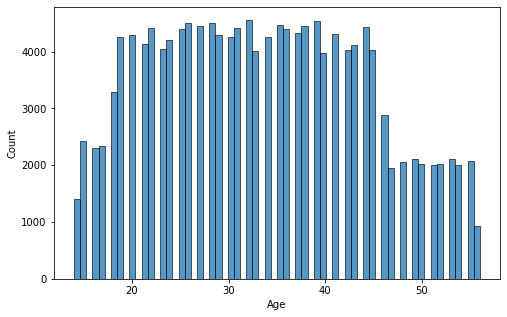

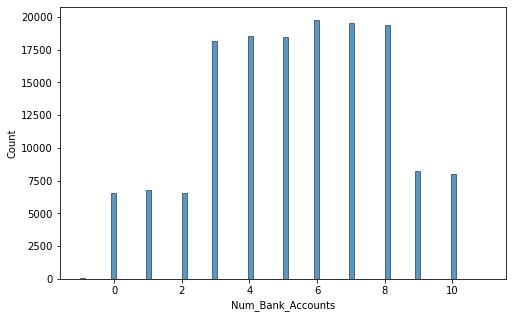

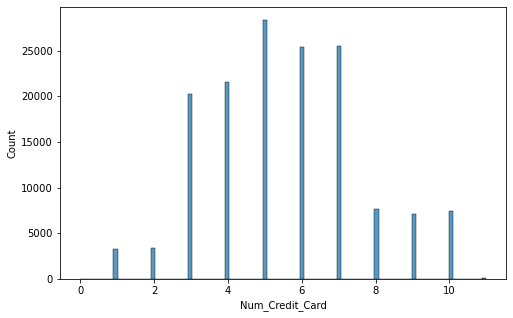

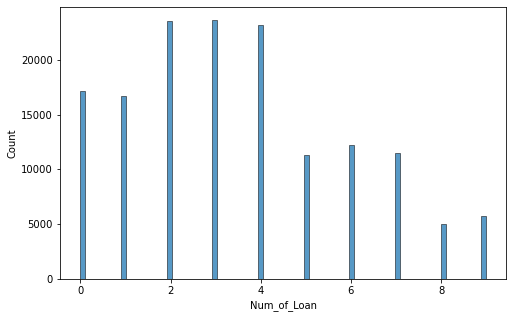

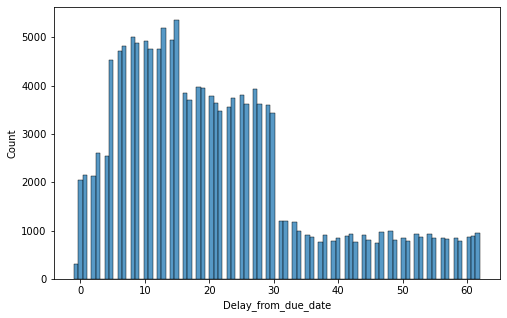

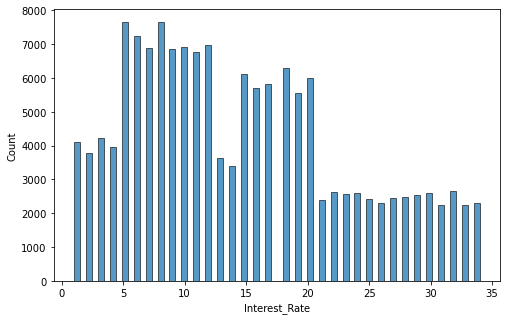

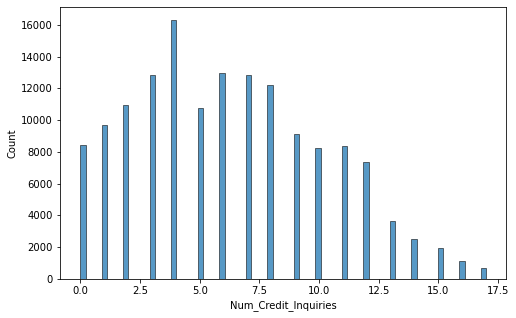

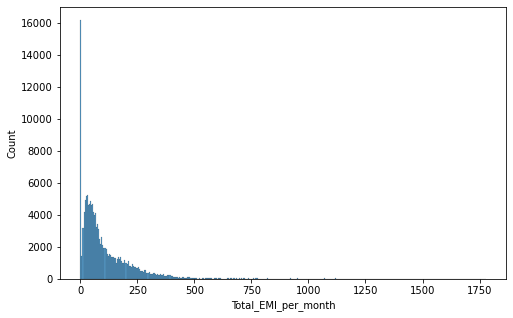

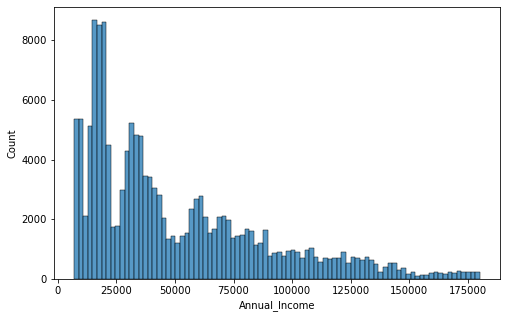

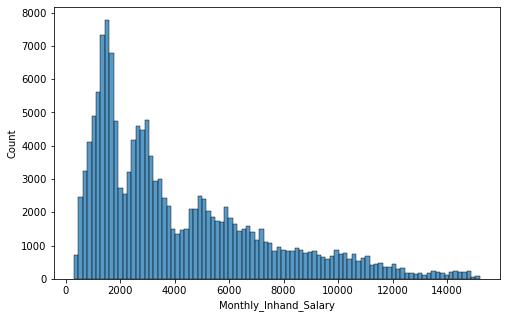

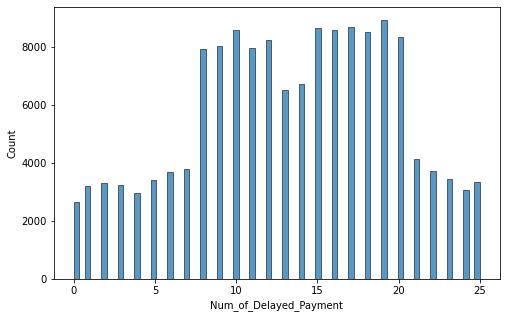

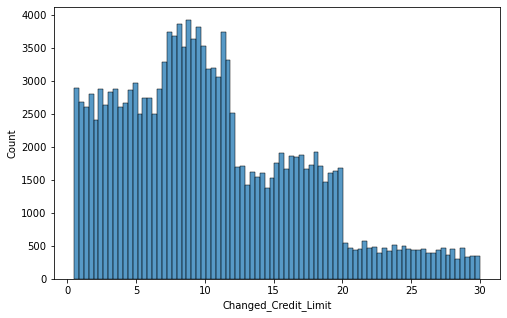

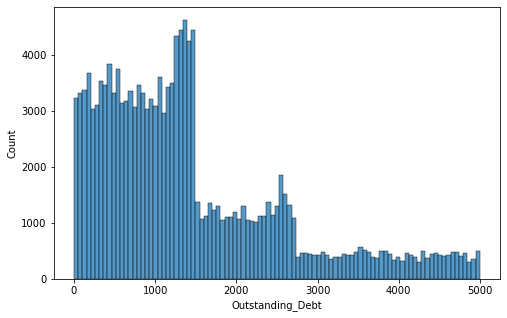

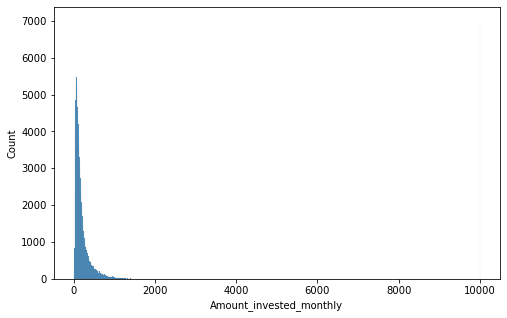

In [138]:
updated_cols = ['Age', 'Num_Bank_Accounts',
               'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date', 'Interest_Rate',
                 'Num_Credit_Inquiries',
                 'Total_EMI_per_month',
                    'Annual_Income',
                    'Monthly_Inhand_Salary',
                    'Num_of_Delayed_Payment',
                    'Changed_Credit_Limit',
                    'Outstanding_Debt',
                    'Amount_invested_monthly'
                 ]
# 'Monthly_Balance'
def histplot():
    for col in updated_cols:
        plt.figure(figsize=(8,5))
        sns.histplot(x=df[col], data=df)
        plt.show()
histplot()

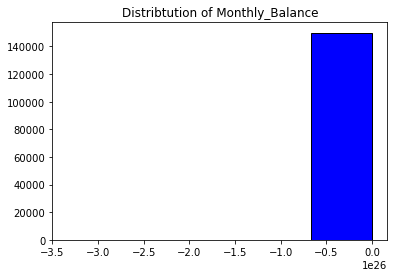

In [139]:
mthly_balance = df['Monthly_Balance'].values
plt.title('Distribtution of Monthly_Balance')
plt.hist(mthly_balance, color='blue', edgecolor='black', bins=5)
plt.show()

In [140]:
lower_upper_bound('Monthly_Balance')

(-25.073750000000018, 753.65625)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  int64  
 3   Name                      150000 non-null  object 
 4   Age                       150000 non-null  float64
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     150000 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  float64
 10  Num_Credit_Card           150000 non-null  float64
 11  Interest_Rate             150000 non-null  float64
 12  Num_of_Loan               150000 non-null  float64
 13  Type_of_Loan              150000 non-null  o

In [142]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

### III. Data Preparation

In [143]:
score = df.copy()

In [144]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  int64  
 3   Name                      150000 non-null  object 
 4   Age                       150000 non-null  float64
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     150000 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  float64
 10  Num_Credit_Card           150000 non-null  float64
 11  Interest_Rate             150000 non-null  float64
 12  Num_of_Loan               150000 non-null  float64
 13  Type_of_Loan              150000 non-null  o

#### Type_of_Loan

In [145]:
df['Type_of_Loan'].value_counts().head()

Missing                    17112
Not Specified               2112
Credit-Builder Loan         1920
Personal Loan               1908
Debt Consolidation Loan     1896
Name: Type_of_Loan, dtype: int64

In [146]:
df['Type_of_Loan'].value_counts().tail()

Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                              12
Payday Loan, Mortgage Loan, Debt Consolidation Loan, and Student Loan                                                                 12
Debt Consolidation Loan, Auto Loan, Personal Loan, Debt Consolidation Loan, Student Loan, and Credit-Builder Loan                     12
Student Loan, Auto Loan, Student Loan, Credit-Builder Loan, Home Equity Loan, Debt Consolidation Loan, and Debt Consolidation Loan    12
Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan                                                               12
Name: Type_of_Loan, dtype: int64

In [147]:
def get_loan_count(x):
    loan_list = x.lower().replace('and', '').split(',')
    loan_list = [x.strip() for x in loan_list]
    count_distinct_loan_type = len(set(loan_list))
    return count_distinct_loan_type

In [148]:
score['Loan_Type_Count'] = score['Type_of_Loan'].apply(lambda x: get_loan_count(x))

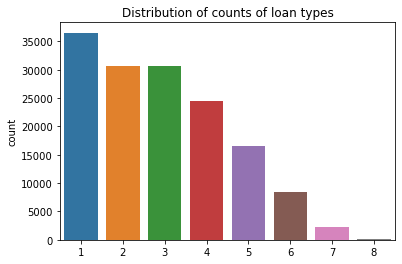

In [149]:
sns.countplot(x=score['Loan_Type_Count'].values, data=score)
plt.title('Distribution of counts of loan types')
plt.show()

#### Frequency Encoding

In [150]:
score['Occupation'].value_counts()

Lawyer          10649
Engineer        10270
Architect       10251
Mechanic        10175
Accountant      10110
Scientist       10103
MediaManager    10081
Developer       10074
Teacher         10021
Entrepreneur     9968
Doctor           9856
Journalist       9829
Manager          9637
Musician         9524
Writer           9452
Name: Occupation, dtype: int64

In [151]:
nominal_col = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

def freq_encoding(df, nominal_cols):
    for col in nominal_cols:
        # generate the frequency encoding for each categorical value in the target column
        fr_enc = (df.groupby(col).size()) / len(df)

        # # print the encoding values
        # print(fr_enc)

        # create a new column that apply frequency encoding to Age Group
        df[col+"_Encoded"] = df[col].apply(lambda x : fr_enc[x])
        
freq_encoding(score, nominal_col)

#### Drop columns

In [152]:
drop_cols = ['ID', 'Customer_ID', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Payment_Behaviour', 
            'Credit_Mix', 'Payment_of_Min_Amount', 'Month']

for col in drop_cols:
    score.drop(col, axis=1, inplace=True)

In [153]:
score.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Loan_Type_Count,Occupation_Encoded,Credit_Mix_Encoded,Payment_of_Min_Amount_Encoded,Payment_Behaviour_Encoded
0,23.0,19114.12,1824.84,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,22.75,49.574949,236.64,186.27,NaN,4,0.067353,0.303753,0.356773,0.275173
1,24.0,19114.12,1824.84,3.0,4.0,3.0,4.0,3.0,9.0,13.27,...,22.83,49.574949,21.47,361.44,NaN,4,0.067353,0.303753,0.356773,0.191400
2,24.0,19114.12,1824.84,3.0,4.0,3.0,4.0,-1.0,4.0,12.27,...,22.92,49.574949,148.23,264.68,NaN,4,0.067353,0.303753,0.356773,0.149433
3,24.0,19114.12,1824.84,3.0,4.0,3.0,4.0,4.0,5.0,11.27,...,23.00,49.574949,39.08,343.83,NaN,4,0.067353,0.303753,0.356773,0.191400
4,28.0,34847.84,3037.99,2.0,4.0,6.0,1.0,3.0,1.0,5.42,...,27.25,18.816215,39.68,485.30,NaN,1,0.067353,0.303753,0.356773,0.148453


In [154]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Age                            150000 non-null  float64
 1   Annual_Income                  150000 non-null  float64
 2   Monthly_Inhand_Salary          150000 non-null  float64
 3   Num_Bank_Accounts              150000 non-null  float64
 4   Num_Credit_Card                150000 non-null  float64
 5   Interest_Rate                  150000 non-null  float64
 6   Num_of_Loan                    150000 non-null  float64
 7   Delay_from_due_date            150000 non-null  float64
 8   Num_of_Delayed_Payment         150000 non-null  float64
 9   Changed_Credit_Limit           150000 non-null  float64
 10  Num_Credit_Inquiries           150000 non-null  float64
 11  Outstanding_Debt               150000 non-null  float64
 12  Credit_Utilization_Ratio      

#### Split train, test set

In [155]:
# Test set
score[score['Credit_Score'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  float64
 1   Annual_Income                  50000 non-null  float64
 2   Monthly_Inhand_Salary          50000 non-null  float64
 3   Num_Bank_Accounts              50000 non-null  float64
 4   Num_Credit_Card                50000 non-null  float64
 5   Interest_Rate                  50000 non-null  float64
 6   Num_of_Loan                    50000 non-null  float64
 7   Delay_from_due_date            50000 non-null  float64
 8   Num_of_Delayed_Payment         50000 non-null  float64
 9   Changed_Credit_Limit           50000 non-null  float64
 10  Num_Credit_Inquiries           50000 non-null  float64
 11  Outstanding_Debt               50000 non-null  float64
 12  Credit_Utilization_Ratio       50000 non-null 

In [156]:
# test save
score[score['Credit_Score'].isna()].drop(columns='Credit_Score').to_csv("clean_test.csv", index=False)

In [157]:
# Train set
score[score['Credit_Score'].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 50000 to 149999
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Age                            100000 non-null  float64
 1   Annual_Income                  100000 non-null  float64
 2   Monthly_Inhand_Salary          100000 non-null  float64
 3   Num_Bank_Accounts              100000 non-null  float64
 4   Num_Credit_Card                100000 non-null  float64
 5   Interest_Rate                  100000 non-null  float64
 6   Num_of_Loan                    100000 non-null  float64
 7   Delay_from_due_date            100000 non-null  float64
 8   Num_of_Delayed_Payment         100000 non-null  float64
 9   Changed_Credit_Limit           100000 non-null  float64
 10  Num_Credit_Inquiries           100000 non-null  float64
 11  Outstanding_Debt               100000 non-null  float64
 12  Credit_Utilization_Ratio  

In [158]:
# train save
score[score['Credit_Score'].notna()].to_csv("clean_train.csv", index=False)